# Solving the Dupire PDE with Forward Euler and Crank-Nicolson schemes

We want to solve the following PDE:  
$$\frac{\partial C}{\partial T} = \frac{1}{2} \sigma^2 K^2 \frac{\partial^2 C}{\partial K^2} -rK \frac{\partial C}{\partial K}, \quad \quad T \in [0,T_{\text{max}}], \quad K \in [0,K_{\text{max}}]$$  
with Dirichlet boundary conditions:  
$C(0,K) = \max\{S_0-K,0\}, \quad K \in [0,T_{\max}]$  
$C(T,0) = S_0, \quad K \in [0,T_{\max}]$  
$C(T,K_{\max}) = 0, \quad K \in [0,T_{\max}]$  

## Forward Euler scheme 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50 #number of points in space
M = 300 #number of points in time
S0 = 10
sigma = 0.3
r = 0.05
K_max = 20
T_max = 1
delta_x = K_max/N
delta_t = T_max/M

In [3]:
#Uniform grids in time and space
K_list_FE = [j*delta_x for j in range(N+1)]
T_list = [i*delta_t for i in range(M+1)]

In [4]:
A = [[0 for i in range(N+1)] for i in range(N+1)]

for i in range(N+1): #diagonal of b
    A[i][i] = -(delta_t * sigma**2 * K_list_FE[i]**2)/(delta_x**2) +1
for i in range(N): #diagonal of c
    A[i][i+1] = (delta_t * sigma**2 * K_list_FE[i]**2)/(2*delta_x**2) - (r*K_list_FE[i]*delta_t)/(2*delta_x)
for i in range(N): #diagonal of a
    A[i+1][i] = (delta_t * sigma**2 * K_list_FE[i]**2)/(2*delta_x**2) + (r*K_list_FE[i]*delta_t)/(2*delta_x)

In [5]:
#initialize C
C = [0 for i in range(N+1)]
for i in range(N+1):
    if S0 - K_list_FE[i] > 0:
        C[i] = (S0 - K_list_FE[i])

Text(0, 0.5, 'Call Value')

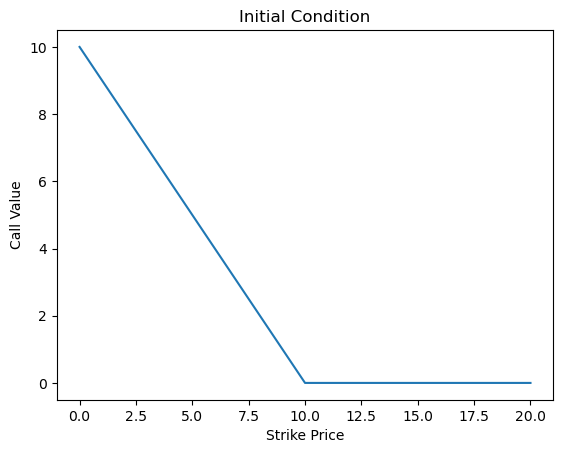

In [6]:
C_list = [C]
C_list
plt.title("Initial Condition")
plt.plot(K_list_FE,C_list[0])
plt.xlabel("Strike Price")
plt.ylabel("Call Value")

In [7]:
for i in range(M+1):
    old_C = C_list[-1]
    new_C = np.matmul(A,old_C)
    new_C[0] = S0
    new_C[-1] = 0
    C_list.append(new_C)

Text(0, 0.5, 'Call Value')

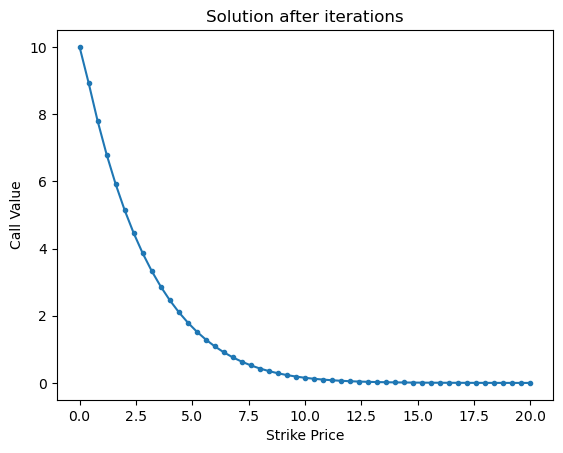

In [8]:
plt.plot(K_list_FE,C_list[-1],".-")
plt.title("Solution after iterations")
plt.xlabel("Strike Price")
plt.ylabel("Call Value")

## Attempt with Crank-Nicolson scheme

In [33]:
N = 50 #number of points in space
M = 300 #number of points in time
S0 = 10
sigma = 0.3
r = 0.05
K_max = 20
T_max = 1
delta_x = K_max/N
delta_t = T_max/M

In [34]:
#Uniform grids in time and space
K_list = [j*delta_x for j in range(N+1)]
T_list = [i*delta_t for i in range(M+1)]

In [35]:
A = [[0 for i in range(N+1)] for i in range(N+1)]

for i in range(N+1):
    A[i][i] = 1 + delta_t * sigma**2 * K_list[i]**2 / (2*delta_x**2)
for i in range(N):
    A[i][i+1] = -delta_t * (sigma**2 * K_list[i]**2 / (4*delta_x**2) - r*K_list[i]/(4*delta_x))
for i in range(N):
    A[i+1][i] = -delta_t * (sigma**2 * K_list[i]**2 / (4*delta_x**2) + r*K_list[i]/(4*delta_x))

In [36]:
B = [[0 for i in range(N+1)] for i in range(N+1)]

for i in range(N+1):
    B[i][i] = 1 - delta_t * sigma**2 * K_list[i]**2 / (2*delta_x**2)
for i in range(N):
    B[i][i+1] = delta_t * (sigma**2 * K_list[i]**2 / (4*delta_x**2) - r*K_list[i]/(4*delta_x))
for i in range(N):
    B[i+1][i] = delta_t * (sigma**2 * K_list[i]**2 / (4*delta_x**2) + r*K_list[i]/(4*delta_x))

In [37]:
#initialize C
C = [0 for i in range(N+1)]
for i in range(N+1):
    if S0 - K_list[i] > 0:
        C[i] = (S0 - K_list[i])

Text(0, 0.5, 'Call Value')

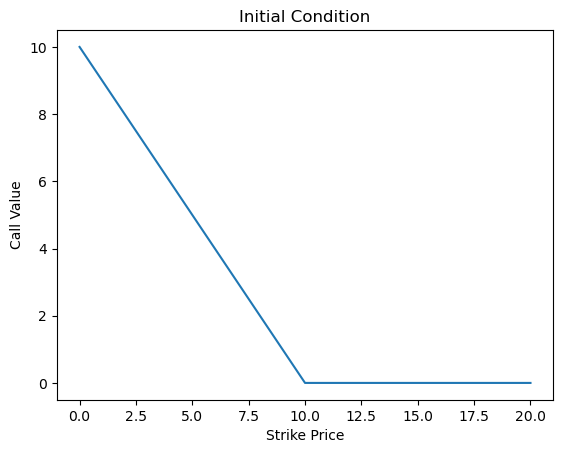

In [38]:
CN_list = [C]
plt.title("Initial Condition")
plt.plot(K_list,CN_list[0])
plt.xlabel("Strike Price")
plt.ylabel("Call Value")

In [39]:
for i in range(M+1):
    old_C = CN_list[-1]
    aux = np.matmul(np.linalg.inv(A), B)
    new_C = np.matmul(aux,old_C)
    new_C[0] = S0
    new_C[-1] = 0
    CN_list.append(new_C)



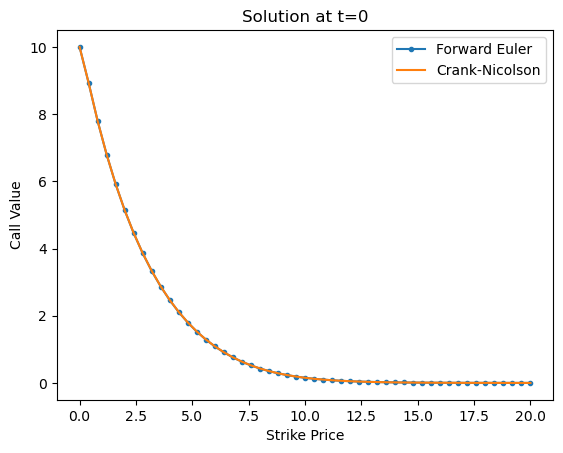

In [55]:
plt.plot(K_list_FE,C_list[-1],".-",label="Forward Euler")
plt.plot(K_list,CN_list[-1],"-",label="Crank-Nicolson")
plt.title("Solution at t=0")
plt.xlabel("Strike Price")
plt.ylabel("Call Value")
plt.legend()

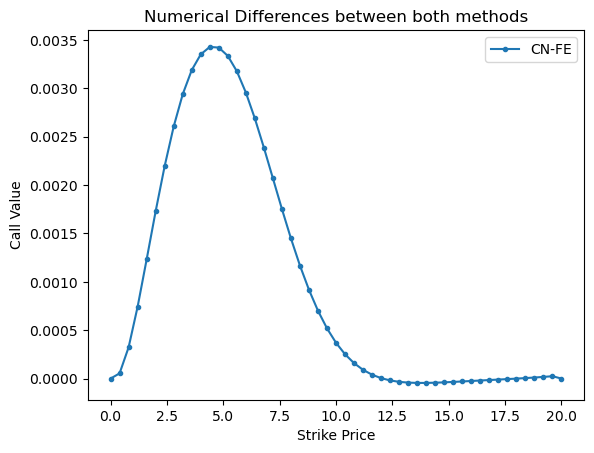

In [56]:
diff_array = np.array(CN_list[-1]) - np.array(C_list[-1])
plt.plot(K_list_FE,diff_array,".-",label="CN-FE")
plt.title("Numerical Differences between both methods")
plt.xlabel("Strike Price")
plt.ylabel("Call Value")
plt.legend()